__`Scipy`__ - Biblioteka zawierająca metody i algorytmy numeryczne. Darmowa i zbudowana na bibliotece `Numpy`.
(https://docs.scipy.org/doc/scipy/reference/)

Niektóre podbiblioteki:
- `scipy.special` - zbiór funkcji specjalnych np. Bassel.
- `scipy.integrate` - algorytmy całkowania numerycznego. 
- `scipy.optimize` - algorytmy optymalizacji.
- `scipy.interpolate` - algorytmy interpolacji.
- `scipy.linalg` - rozszerzona algebra liniowa z pakietu `Numpy`.
- `scipy.stats` - statystyka, dyskretne i ciągłe rozkłady prawdopodobieństwa.

__Szukanie pierwiastków.__

Podbiblioteka `scipy.optimize` zawiera m.in. algorytmy do znajdowania miejsc zerowych funkcji.

Dla funkcji jednej zmiennej:

In [1]:
import  numpy as np
from scipy import optimize

# Metoda bisekcji bisect(fun, a, b, args)
optimize.bisect(lambda x: np.exp(x) - 2, -2, 2)

0.6931471805601177

In [2]:
# Metoda Newtona newton(func, x0, fprime, args)
# opcjonalnie możemy podać fprime, jeśli nie podamy to pochodna liczona jest numerycznie
optimize.newton(lambda x: np.exp(x) - 2, 2)

0.6931471805599455

In [3]:
# Inne Metody: brentq, brenth, ridder
optimize.brentq(lambda x: np.exp(x) - 2, -2, 2)

0.6931471805599453

Dla funkcji wielowymiarowych:

In [4]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

def f_jacobian(x):
    return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]

# Metoda fsolve(func, x0, args)
optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

In [5]:
# Metoda root() - interface do różnych metod (patrz dokumentacja)
sol = optimize.root(f, [1, 1], method='broyden2')
sol

     fun: array([-3.67934971e-09,  1.13798051e-07])
 message: 'A solution was found at the specified tolerance.'
     nit: 10
  status: 1
 success: True
       x: array([0.73205083, 0.4641017 ])

__Optymalizacja.__

`scipy.optimize` - algorytmy optymalizacji.

Dla funkcji jednej zmiennej: 

Metoda `minimize_scalar()`.

In [6]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r

res = optimize.minimize_scalar(f, bracket=(0.1, 5))
res

     fun: 5.535810445932086
    nfev: 17
     nit: 13
 success: True
       x: 0.5419260648976671

<IPython.core.display.Javascript object>


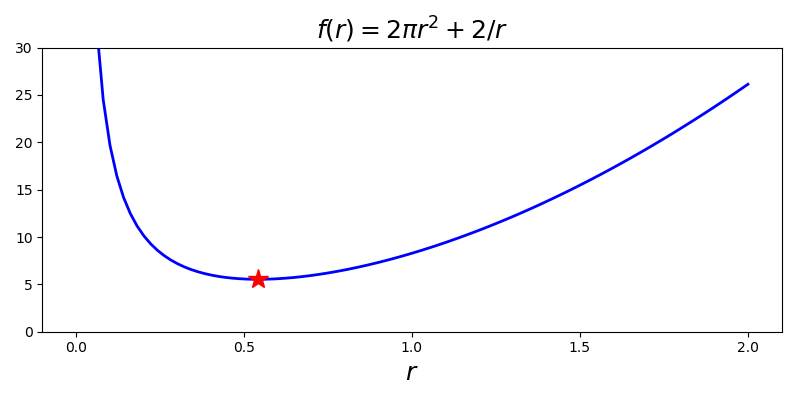

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
r = np.linspace(0.001, 2, 100)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(r, f(r), lw=2, color='b')
ax.plot(res.x, f(res.x), 'r*', markersize=15)
ax.set_title(r"$f(r) = 2\pi r^2+2/r$", fontsize=18)
ax.set_xlabel(r"$r$", fontsize=18)
ax.set_xticks([0, 0.5, 1, 1.5, 2])
ax.set_ylim(0, 30)
fig.tight_layout()

Dla funkcji wielu zmiennych:

Metoda `minimize()` - interface do wielu metod optymalizacji.

In [8]:
f = lambda x: (x[0]-1)**4 + 5 * (x[1]-1)**2 - 2*x[0]*x[1]
x0 = [0, 0]
x_opt = optimize.minimize(f, x0, method='BFGS')
x_opt

      fun: -3.8672228877101262
 hess_inv: array([[0.11091664, 0.02064741],
       [0.02064741, 0.10048636]])
      jac: array([1.54972076e-06, 6.70552254e-06])
  message: 'Optimization terminated successfully.'
     nfev: 52
      nit: 9
     njev: 13
   status: 0
  success: True
        x: array([1.88292645, 1.37658596])

<IPython.core.display.Javascript object>


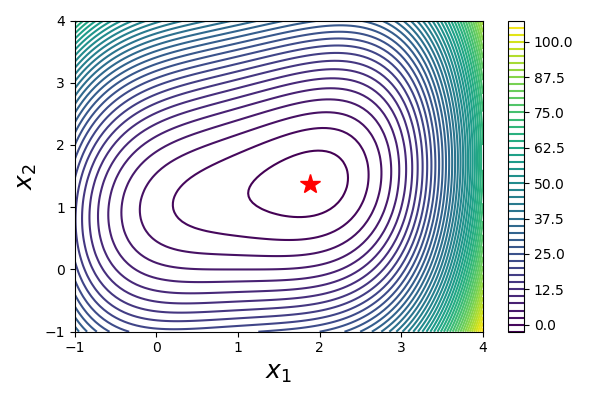

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f([X, Y]), 50)
ax.plot(x_opt.x[0], x_opt.x[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()

Optymalizacja z ograniczeniami.

In [10]:
f = lambda x: (x[0]-1)**2 + (x[1]-1)**2

# bez ograniczeń
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
# z ograniczeniami
bnd_x1, bnd_x2 = (2, 3), (0, 2)
x_cons_opt = optimize.minimize(f, np.array([0, 0]), method='L-BFGS-B', bounds=[bnd_x1, bnd_x2]).x
print('bez ograniczeń', x_opt)
print('z ograniczeniami', x_cons_opt)

bez ograniczeń [0.99999999 0.99999999]
z ograniczeniami [2. 1.]


<IPython.core.display.Javascript object>


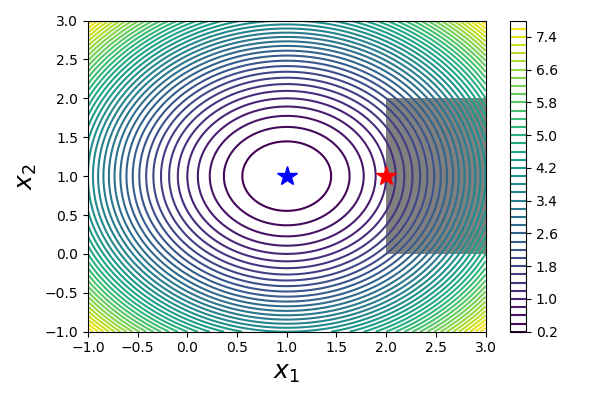

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f([X, Y]), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]), 
                           bnd_x1[1] - bnd_x1[0], bnd_x2[1] - bnd_x2[0],
                           facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()

In [12]:
f = lambda x: (x[0] - 1)**2 + (x[1] - 1)**2
g = lambda x: x[1] - 1.75 - (x[0] - 0.75)**4

# bez ograniczen
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
# z ograniczeniami 
constraints = [dict(type='ineq', fun=g)]
x_cons_opt = optimize.minimize(f, (0, 0), method='COBYLA', constraints=constraints).x
print('bez ograniczeń', x_opt)
print('z ograniczeniami', x_cons_opt)

bez ograniczeń [0.99999999 0.99999999]
z ograniczeniami [0.96865024 1.75228559]


<IPython.core.display.Javascript object>


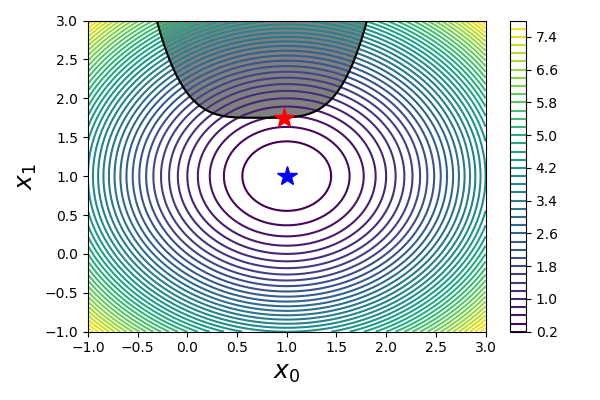

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f([X, Y]), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)

ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color="grey")
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)

ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()

Nieliniowa metoda najmniejszych kwadratów. Dopasowywanie funkcji do danych.

Metoda `leastsq()`.

In [14]:
def f(x, beta0, beta1, beta2):
    return beta0 + beta1 * np.exp(-beta2 * x**2)

beta = (0.25, 0.75, 0.5)
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

def g(beta):
    return ydata - f(xdata, *beta)

beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

array([0.25179449, 0.75288166, 0.52953802])

<IPython.core.display.Javascript object>


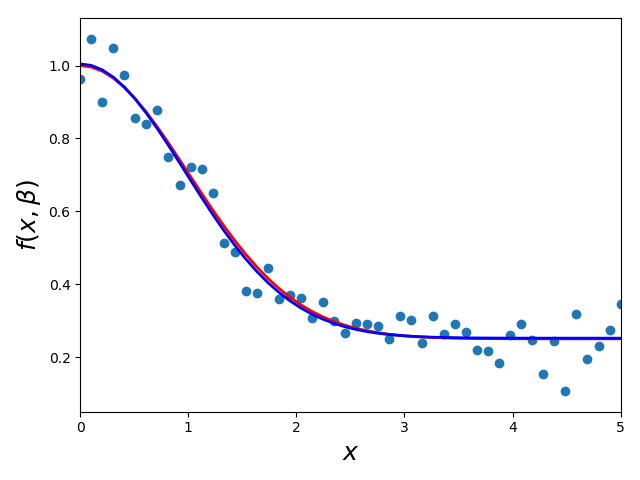

In [15]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
fig.tight_layout()

__Aproksymacja i Interpolacja.__

`numpy.polynominal` i `scipy.interpolate`.

Dopasowanie wielomianu do danych.

In [16]:
from numpy import polynomial as P

# przykładowe dane
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

f1 = P.Polynomial.fit(x, y, 1)
f2 = P.Polynomial.fit(x, y, 2)
f3 = P.Polynomial.fit(x, y, 3)
f1, f2, f3

(Polynomial([3.25, 1.65], domain=[1., 4.], window=[-1.,  1.]),
 Polynomial([ 4.1875,  1.65  , -1.6875], domain=[1., 4.], window=[-1.,  1.]),
 Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.]))

<IPython.core.display.Javascript object>


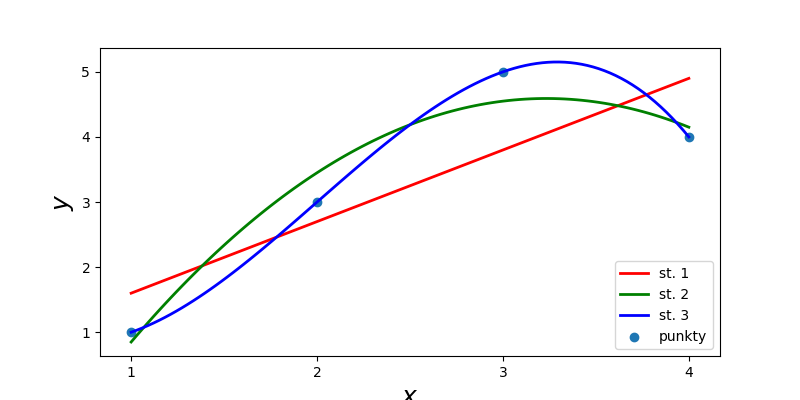

In [17]:
xx = np.linspace(x.min(), x.max(), 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(xx, f1(xx), 'r', lw=2, label='st. 1')
ax.plot(xx, f2(xx), 'g', lw=2, label='st. 2')
ax.plot(xx, f3(xx), 'b', lw=2, label='st. 3')
ax.scatter(x, y, label='punkty')
ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18);

Interpolacja wielomianowa. Runge problem.

In [18]:
def runge(x):
    return 1/(1 + 25 * x**2)

def runge_interpolate(n):
    x = np.linspace(-1, 1, n+1)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p

<IPython.core.display.Javascript object>


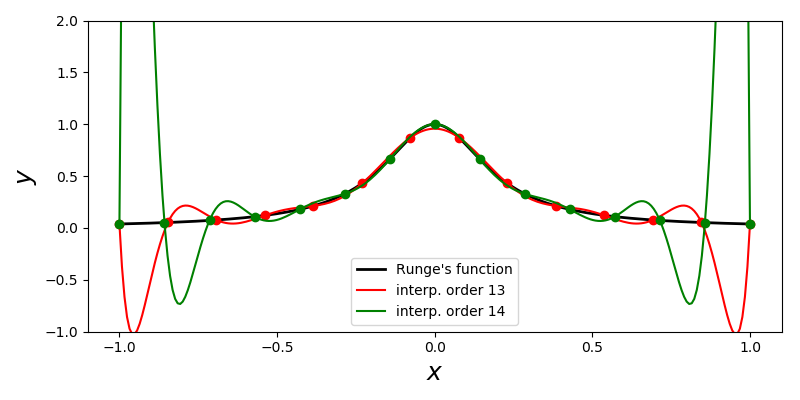

In [19]:
xx = np.linspace(-1, 1, 250)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")
n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d' % n)
n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d' % n)
ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
fig.tight_layout()

Interpolacja splajnami.

Metoda `interp1d()` - interpolacja funkcji jedno-wymiarowych.
Metoda `interp2d()` - interpolacja funkcji dwu-wymiarowych.

In [20]:
from scipy import interpolate

x = np.linspace(-1, 1, 11)
y = runge(x)
f = interpolate.interp1d(x, y, kind=3)
xx = np.linspace(-1, 1, 100)

<IPython.core.display.Javascript object>


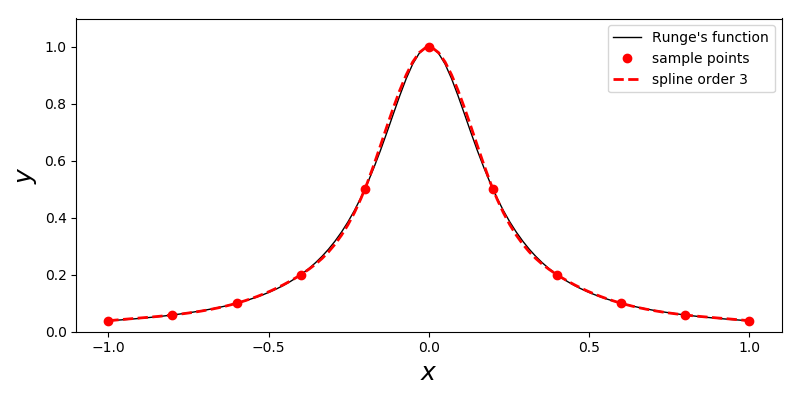

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f(xx), 'r--', lw=2, label='spline order 3')
ax.legend()
ax.set_ylim(0, 1.1)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
fig.tight_layout()

<IPython.core.display.Javascript object>


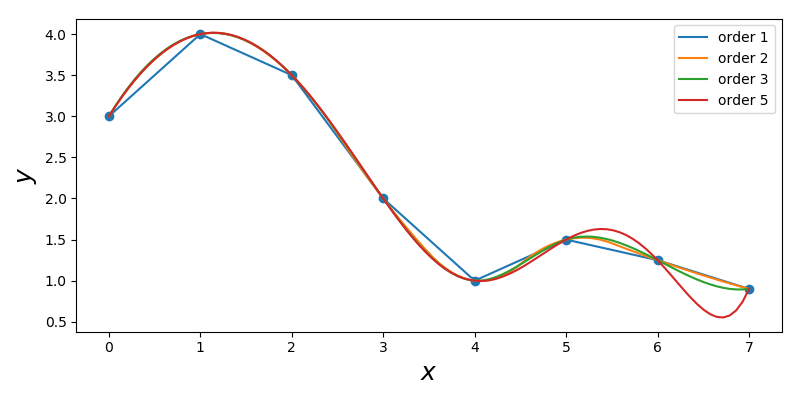

In [22]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])
xx = np.linspace(x.min(), x.max(), 100)
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)
for n in [1, 2, 3, 5]:
    f = interpolate.interp1d(x, y, kind=n)
    ax.plot(xx, f(xx), label='order %d' % n)
ax.legend()
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
fig.tight_layout()

__Całkowanie numeryczne.__

`scipy.integrate` - algorytmy całkowania numerycznego.

Metody `quad()`, `dblquad()`, `tplquad()` `nquad()` - całkowanie całek odpowiednio pojedyńczych, podwójnych, potrójnych i n-krotnych. Zwracają wartość całki oraz oszacowany błąd. 

Możliwość podania funkcji zdefiniowanej klasycznie przez `def`, jak także przez wyrażenie `lambda`. Możliwe jest też przez specjalny wykorzystanie funkcji napisanej w języku C.

In [23]:
from scipy import integrate

f = lambda x: np.exp(-x)*np.sin(x)

res, err = integrate.quad(f, 0, 2*np.pi)
res, err

(0.49906627863414593, 6.023731631928322e-15)

<IPython.core.display.Javascript object>


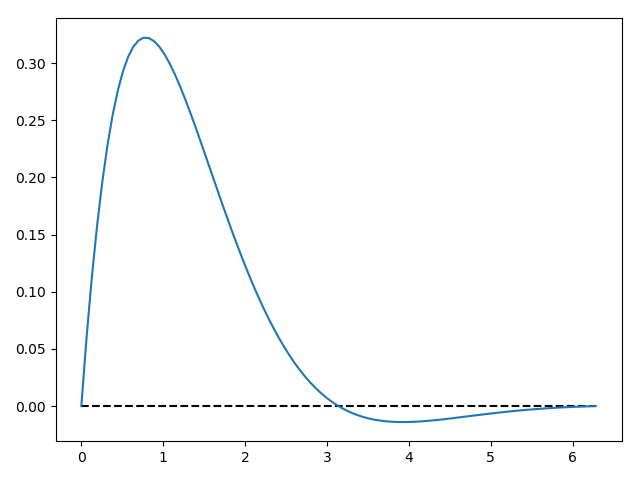

In [24]:
x = np.linspace(0, 2*np.pi,100)
y = f(x)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.hlines(0, 0, 2*np.pi, linestyles='dashed')
fig.tight_layout()

In [25]:
res, err = integrate.quad(f, 0, np.inf)
res, err

(0.5000000000000002, 1.4875911973447031e-08)

Osobliwości, punkty nieciągłości: argument `points`.

In [26]:
f = lambda x: 1/np.sqrt(abs(x))
res, err = integrate.quad(f, -1, 1)
res, err

C:\Users\AdamM\Anaconda3\envs\pykurs\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.
C:\Users\AdamM\Anaconda3\envs\pykurs\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(nan, nan)

<IPython.core.display.Javascript object>


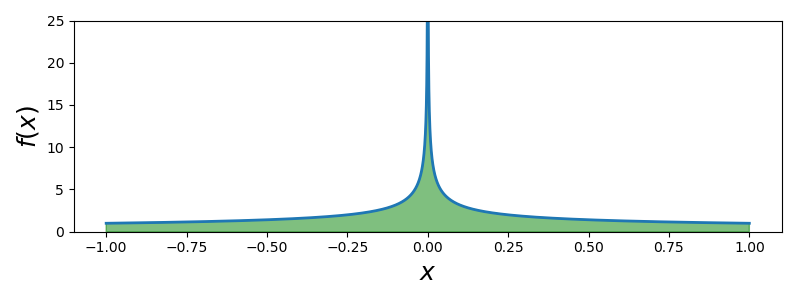

In [27]:
fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(-1, 1, 10000)
ax.plot(x, f(x), lw=2)
ax.fill_between(x, f(x), color='green', alpha=0.5)
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$f(x)$", fontsize=18)
ax.set_ylim(0, 25)
fig.tight_layout()

In [28]:
res, err = integrate.quad(f, -1, 1, points=[0])
res, err

(3.9999999999999813, 5.684341886080802e-14)

Całkowanie na bazie punktów.

<IPython.core.display.Javascript object>


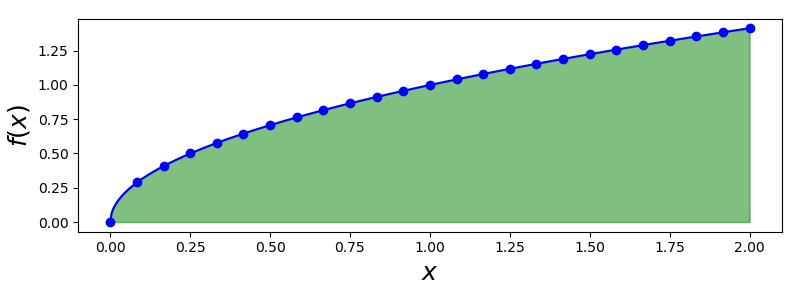

In [29]:
f = lambda x: np.sqrt(x)
x = np.linspace(0, 2, 25)
y = f(x)
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'bo')
xx = np.linspace(0, 2, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)
fig.tight_layout()

Metoda trapezów `trapz()` i metoda Simpsona `simps()`.

In [30]:
val_trapz = integrate.trapz(y, x)
val_simps = integrate.simps(y, x)
val_exact = 2.0/3.0 * (2)**(3.0/2.0)
er_trapz = val_exact - val_trapz
er_simps = val_exact - val_simps
print(val_trapz, er_trapz)
print(val_simps, er_simps)

1.8808217160508505 0.004796367113276245
1.883665102448715 0.001952980715411723


Całki wielokrotne:

In [31]:
def f(x, y):
    return np.exp(-x**2-y**2)

# granice całkowania po x
a, b = 0, 1
# granice całkowania po y jako funkcje
g = lambda x: 0
h = lambda x: 1

In [32]:
integrate.dblquad(f, a, b, g, h)

(0.5577462853510337, 8.291374381535408e-15)

In [33]:
# można też w jednej linijce
integrate.dblquad(lambda x, y: np.exp(-x**2-y**2), 0, 1, lambda x: 0, lambda x: 1)

(0.5577462853510337, 8.291374381535408e-15)

In [34]:
integrate.dblquad(f, 0, 1, lambda x: -1 + x, lambda x: 1 - x)

(0.7320931000008094, 1.6564972931774035e-14)

In [35]:
def f(x, y, z):
    return np.exp(-x**2-y**2-z**2)

integrate.tplquad(f, 0, 1, lambda x : 0, lambda x : 1, lambda x, y : 0, lambda x, y : 1)

(0.4165383858866382, 8.291335287314424e-15)

In [36]:
integrate.nquad(f, [(0, 1), (0, 1), (0, 1)])

(0.4165383858866382, 8.291335287314424e-15)

__Równania różniczkowe.__

Numeryczne całkowanie równań różniczkowych zwyczajnych.

Metoda `odeint()`: rozwiązuje równanie różniczkowe postaci $y'(x)=f(y,x)$.

<IPython.core.display.Javascript object>


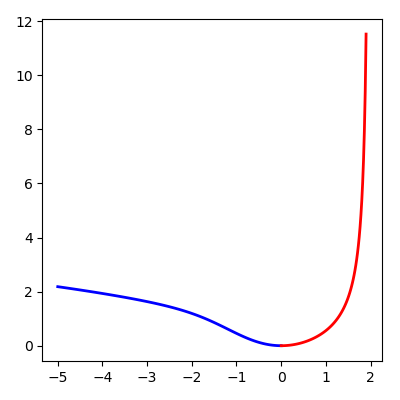

In [37]:
def f(y, x):
    return y**2 + x

y0 = 0
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f, y0, xp)
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f, y0, xm)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)
fig.tight_layout()

Równanie Lotki-Volterra. Model drapieżnik-ofiara.
$$x'(t)=ax−bxy$$
$$y'(t)=cxy−dy$$

In [38]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7

def f(xy, t):
    x, y = xy
    return [a * x - b * x * y,
            c * x * y - d * y]

xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = integrate.odeint(f, xy0, t)
xy_t

array([[ 600.        ,  400.        ],
       [ 554.71678773,  390.2315786 ],
       [ 515.18872341,  377.47471516],
       [ 481.16538017,  362.45042793],
       [ 452.26291494,  345.834768  ],
       [ 428.03585856,  328.22779805],
       [ 408.0270821 ,  310.13908255],
       [ 391.79948778,  291.98507064],
       [ 378.95383368,  274.0941893 ],
       [ 369.13699355,  256.71617503],
       [ 362.04406158,  240.03321788],
       [ 357.41676551,  224.17136089],
       [ 355.03994501,  209.2111947 ],
       [ 354.73716891,  195.19739738],
       [ 356.36616628,  182.14693764],
       [ 359.81443545,  170.05595026],
       [ 364.99522213,  158.90537822],
       [ 371.8439288 ,  148.66553184],
       [ 380.31495676,  139.29972204],
       [ 390.37894214,  130.76712304],
       [ 402.02032917,  123.02500541],
       [ 415.23521627,  116.03046597],
       [ 430.02940375,  109.74175743],
       [ 446.41657812,  104.11931191],
       [ 464.41656152,   99.12653342],
       [ 484.05355695,   

<IPython.core.display.Javascript object>


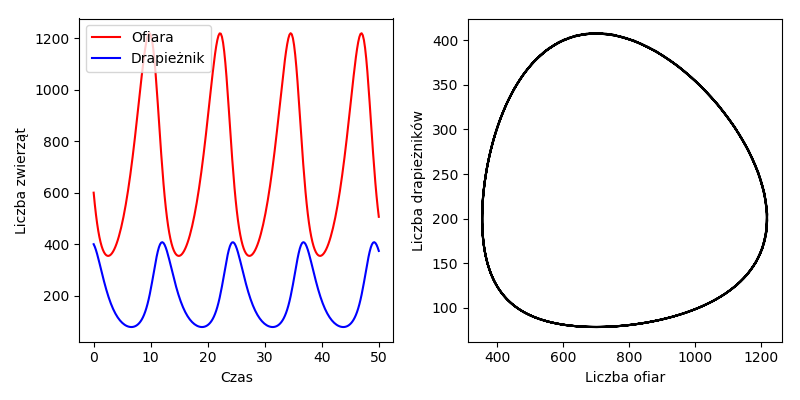

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].plot(t, xy_t[:,0], 'r', label="Ofiara")
axes[0].plot(t, xy_t[:,1], 'b', label="Drapieżnik")
axes[0].set_xlabel("Czas")
axes[0].set_ylabel("Liczba zwierząt")
axes[0].legend()

axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Liczba ofiar")
axes[1].set_ylabel("Liczba drapieżników")
fig.tight_layout()

__Rozkłady prawdopodobieństwa i zmienne losowe.__

`scipy.stats`

In [40]:
from scipy import stats

X = stats.norm(1, 0.5)
X

In [41]:
X.mean(), X.median(), X.std(), X.var()

(1.0, 1.0, 0.5, 0.25)

In [42]:
moments = [X.moment(n) for n in range(5)]
moments

[1.0, 1.0, 1.25, 1.75, 2.6875]

Gęstość i dystrybuanta.

In [43]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [44]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

Próbka losowa.

In [45]:
X.rvs(10)

array([0.73927044, 1.19270431, 0.73093775, 1.08112768, 0.99797797,
       1.3514757 , 0.32221821, 0.49018065, 1.20116848, 1.17860577])

In [48]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    ax.hist(X_samples, label="samples", density=1, bins=75)
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

<IPython.core.display.Javascript object>


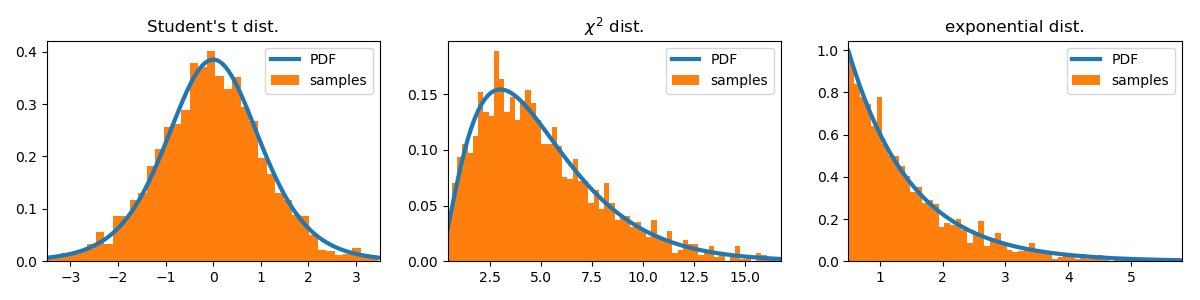

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(2000), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(2000), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(2000), "exponential dist.", ax=axes[2])
fig.tight_layout()

Estymatory jądrowe.

In [50]:
X = stats.chi2(df=5)
X_samples = X.rvs(100)
kde = stats.kde.gaussian_kde(X_samples)
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)

<IPython.core.display.Javascript object>


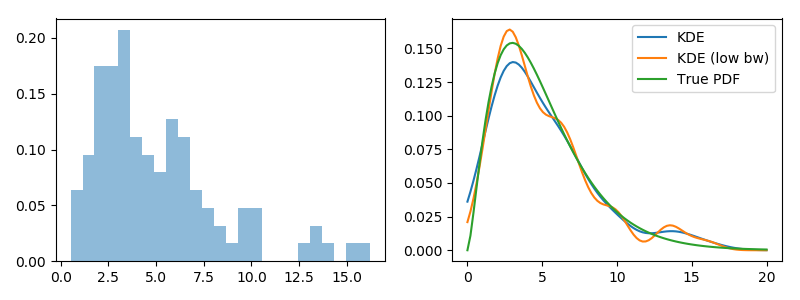

In [51]:
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].hist(X_samples, normed=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
fig.tight_layout()